<a href="https://colab.research.google.com/github/alexanderBrena98/trabajos_Python/blob/main/Proyecto_Final_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROYECTO FINAL**
**PYTHON PARA DATA ANALYTICS**






**Comprensión del Problema:**
En un equipo de Data Analyst de una compañía de telecomunicaciones llamada “Opaco”, el Gerente  ha pedido realizar un análisis, para explicar el negocio de la venta de equipos móviles de la base de datos "***base_proyecto***".
Para eso se ha designado responder las siguientes preguntas:




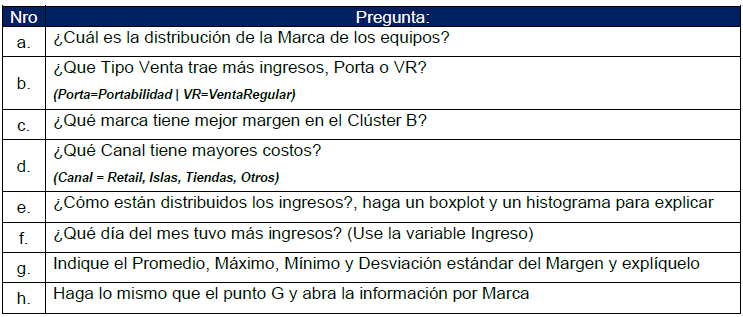

La base de datos del presente proyecto va a tener que pasar por un Análisis Exploratorio de Datos (EDA), con el fin de obtener una data lo más confiable posible. Por lo cual, se va a usar la siguiente estructura:
1. Carga de datos
2. Exploración inicial de datos
3. Limpieza de datos
4. Visualización de datos
5. Conclusiones












**Análisis Exploratorio de Datos (EDA)**

1. Carga de Datos

In [ ]:
# Empezamos importando todas las librerias que necesitaremos para hacer el EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargamos la data a traves de Google Drive
proyecto_df = pd.read_excel("/content/drive/MyDrive/Data Science Research Python/Proyecto/base_proyecto.xlsx")

2. Exploración inicial de datos

In [ ]:
# Para visualizar por medio de tablas la base de datos, usaremos el comando head.
proyecto_df.head(10) # Dependiendo de la cantidad de filas que queremos ver, colocaremos un número.

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster,Canal2
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,NaN,173.03390,192.39,NaN,NaN,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A,#ERROR!
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,355.22030,338.88,NaN,NaN,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B,#ERROR!
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,NaN,725.38980,769.94,NaN,NaN,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B,#ERROR!
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,56.23729,35.41,NaN,NaN,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A,#ERROR!
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,49.70339,34.85,NaN,NaN,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A,#ERROR!
5,202110,6,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,66.94915,34.81,NaN,NaN,VR,ISLAS,ISLA,LA LIBERTAD,ISLAS,ISLAS,Cluster B,#ERROR!
6,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,47.94915,33.82,NaN,NaN,Porta,GRANDES TIENDAS,RIPLEY,LIMA,Retail,GRANDES TIENDAS,Cluster A,#ERROR!
7,202110,18,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,319.62710,337.70,NaN,NaN,Porta,GRANDES TIENDAS,PLAZAVEA,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B,#ERROR!
8,202110,27,Equipo,Celular,Smartphone,Motorola,3. Mid,NaN,503.51690,600.12,NaN,NaN,Porta,GRANDES TIENDAS,SODIMAC,LIMA,Retail,GRANDES TIENDAS,Cluster A,#ERROR!
9,202110,3,Equipo,Celular,Smartphone,Motorola,2. Entry Smart,NaN,298.27120,404.24,NaN,NaN,Porta,GRANDES TIENDAS,SAGA,LIMA,Retail,GRANDES TIENDAS,Cluster A,#ERROR!


In [ ]:
# Para tener un resumen de la cantidad de datos que tenemos y de que tipo son, usaremos el comando info y dtypes.
proyecto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19552 non-null  int64  
 1   Dia           19552 non-null  int64  
 2   EquipoSim     19552 non-null  object 
 3   Tipo          19552 non-null  object 
 4   Subtipo       19552 non-null  object 
 5   Marca         19552 non-null  object 
 6   Gama          19552 non-null  object 
 7   Precio        0 non-null      float64
 8   Ingreso       19552 non-null  float64
 9   Costo         19552 non-null  float64
 10  Margen        0 non-null      float64
 11  Rentabilidad  0 non-null      float64
 12  Tipo Venta    19552 non-null  object 
 13  CanalVenta    19551 non-null  object 
 14  CadenaDealer  16243 non-null  object 
 15  Departamento  19404 non-null  object 
 16  Canal         19552 non-null  object 
 17  SubCanal      19552 non-null  object 
 18  Cluster       19404 non-nu

In [ ]:
proyecto_df.dtypes
proyecto_df.dtypes.value_counts()

object     13
float64     5
int64       2
dtype: int64

In [ ]:
# Con el comando shape podemos saber la cantidad de filas y columnas que tiene nuestra base de datos.
proyecto_df.shape

(19552, 20)

3. Limpieza de datos


In [ ]:
# Para empezar con la limpieza, vamos averiguar la cantidad de valores nulos que existen en la base datos.
print("Cantidad total de valores nulos:",proyecto_df.isnull().sum().sum())

Cantidad total de valores nulos: 62262


In [ ]:
# Hallaremos la cantidad de valores nulos que presenta cada campo dentro de la base de datos.
proyecto_df.isnull().sum()

Periodo             0
Dia                 0
EquipoSim           0
Tipo                0
Subtipo             0
Marca               0
Gama                0
Precio          19552
Ingreso             0
Costo               0
Margen          19552
Rentabilidad    19552
Tipo Venta          0
CanalVenta          1
CadenaDealer     3309
Departamento      148
Canal               0
SubCanal            0
Cluster           148
Canal2              0
dtype: int64

In [ ]:
# Dentro de la data se ha obervado algunas filas que tienen elementos duplicados, para lo cual su eliminación se realizara de la siguiente manera:
proyecto_df.drop_duplicates(inplace=True)
proyecto_df.info()

# Si comparamos con la cantidad de datos que habia anteriormente, podemos observar que la cantidad de valores ha disminuido, en todas las columnas de la base de datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17143 entries, 0 to 19548
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       17143 non-null  int64  
 1   Dia           17143 non-null  int64  
 2   EquipoSim     17143 non-null  object 
 3   Tipo          17143 non-null  object 
 4   Subtipo       17143 non-null  object 
 5   Marca         17143 non-null  object 
 6   Gama          17143 non-null  object 
 7   Precio        0 non-null      float64
 8   Ingreso       17143 non-null  float64
 9   Costo         17143 non-null  float64
 10  Margen        0 non-null      float64
 11  Rentabilidad  0 non-null      float64
 12  Tipo Venta    17143 non-null  object 
 13  CanalVenta    17142 non-null  object 
 14  CadenaDealer  14354 non-null  object 
 15  Departamento  17019 non-null  object 
 16  Canal         17143 non-null  object 
 17  SubCanal      17143 non-null  object 
 18  Cluster       17019 non-nu

In [ ]:
# Luego de haber hecho el análisis y la limpieza necesaria a la base de datos
# Vamos a rellenar la data faltante de la columna 'Margen', 'Rentabilidad' y 'Cluster'
proyecto_df['Margen'].fillna(proyecto_df['Ingreso'] - proyecto_df['Costo'], inplace=True)
proyecto_df['Rentabilidad'].fillna(proyecto_df['Margen']/proyecto_df['Ingreso'], inplace=True)
proyecto_df['Cluster'].fillna('Otros', inplace=True)
proyecto_df.head(5)


,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster,Canal2
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,NaN,173.03390,192.39,-19.35610,-0.111863,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A,#ERROR!
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,355.22030,338.88,16.34030,0.046000,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B,#ERROR!
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,NaN,725.38980,769.94,-44.55020,-0.061416,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B,#ERROR!
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,56.23729,35.41,20.82729,0.370347,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A,#ERROR!
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,49.70339,34.85,14.85339,0.298841,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A,#ERROR!


In [ ]:
print(f"Filas:{proyecto_df.shape[0]}, Columnas:{proyecto_df.shape[1]}")

Filas:17143, Columnas:20


In [ ]:
# Vamos a Reemplazar 'Porta' con 'Portabilidad', 'VR' con 'VentaRegular' y 'Reno' con 'Renovación en la columna 'Tipo Venta'
proyecto_df['Tipo Venta'] = proyecto_df['Tipo Venta'].replace({'Porta': 'Portabilidad', 'VR': 'VentaRegular','Reno':'Renovación'})
proyecto_df.head(3)

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster,Canal2
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,NaN,173.0339,192.39,-19.3561,-0.111863,Portabilidad,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A,#ERROR!
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,355.2203,338.88,16.3403,0.046000,VentaRegular,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B,#ERROR!
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,NaN,725.3898,769.94,-44.5502,-0.061416,Portabilidad,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B,#ERROR!


4. Visualización de datos

# PREGUNTAS:


# **a. ¿Cúal es la distribución de la Marca de los equipos? **

In [ ]:
marca = proyecto_df['Marca'].value_counts()
print("La distribución de la Marca de los equipos son:","\n")
print(marca)

La distribución de la Marca de los equipos son: 

Bmobile     3736
Motorola    3513
Samsung     3346
Xiaomi      3130
ZTE         2651
POCO         231
Alcatel      173
Vivo         115
Nokia         56
Azumi         54
Realme        51
EKS           46
Apple         32
LG             7
Huawei         2
Name: Marca, dtype: int64


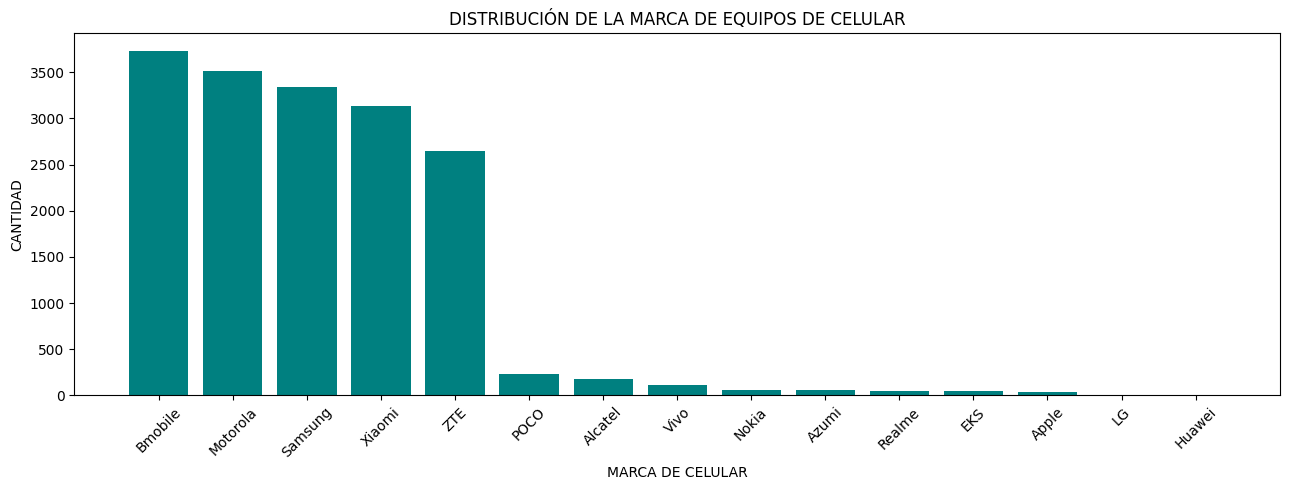

In [ ]:
# Para tener una mejor visión de esta distribución, haremos un gráfico de barras
marca = proyecto_df['Marca'].value_counts()
plt.figure(figsize=(13,5))
plt.bar(marca.index, marca.values, color='teal')
plt.xlabel('MARCA DE CELULAR')
plt.ylabel('CANTIDAD')
plt.title('DISTRIBUCIÓN DE LA MARCA DE EQUIPOS DE CELULAR')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



# **b.¿Qué Tipo de Venta trae más ingresos, Porta o VR? (Porta = Portabilidad | VR = VentaRegular)**

In [ ]:
# Primero filtramos el campo según Portabilidad y Venta Regular
df = proyecto_df[proyecto_df['Tipo Venta'].isin(['VentaRegular','Portabilidad'])]
# Calcular la suma de ingresos por tipo de venta
ingresos_por_tipo = df.groupby('Tipo Venta')['Ingreso'].sum()

# Encontrar el tipo de venta con más ingresos
tipo_mas_ingresos = ingresos_por_tipo.idxmax()
ingresos_maximos = ingresos_por_tipo.max()

# Mostrar el resultado
print(f"El tipo de venta con más ingresos es {tipo_mas_ingresos} con un total de ingresos de {ingresos_maximos.round(2)}")

El tipo de venta con más ingresos es Portabilidad con un total de ingresos de 2104848.56


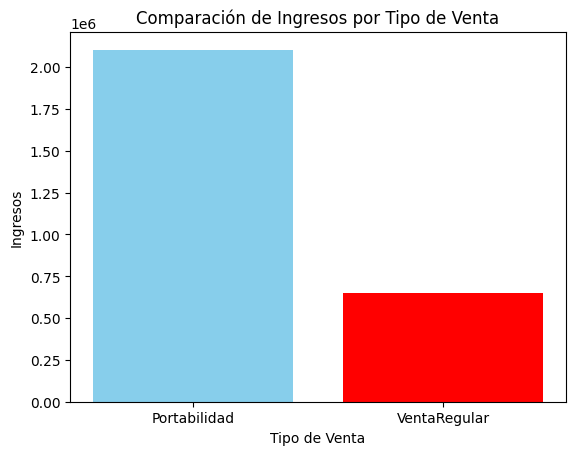

In [ ]:
# Crearemos un gráfico para visualizar mejor estos valores
# Calcular la suma de ingresos por tipo de venta
ingresos_por_tipo = df.groupby('Tipo Venta')['Ingreso'].sum()

# Crear un gráfico de barras
plt.bar(ingresos_por_tipo.index, ingresos_por_tipo.values, color=('skyblue','red'))

# Configurar etiquetas y título
plt.xlabel('Tipo de Venta')
plt.ylabel('Ingresos')
plt.title('Comparación de Ingresos por Tipo de Venta')

plt.show()

# c.¿Qué marca tiene mejor margen en el clúster B?

Marca
Alcatel      -370.63240
Apple        -838.67630
Azumi         524.66189
Bmobile     17509.35967
EKS           140.10507
Huawei        -80.32700
LG           -485.98720
Motorola   -93496.98911
Nokia         181.88170
POCO         -812.56340
Realme        575.93350
Samsung    -22209.88878
Vivo          904.87910
Xiaomi       8386.08732
ZTE         -2332.88437
Name: Margen, dtype: float64
La mejor marca con el mejor margen en el Cluster B es: Bmobile




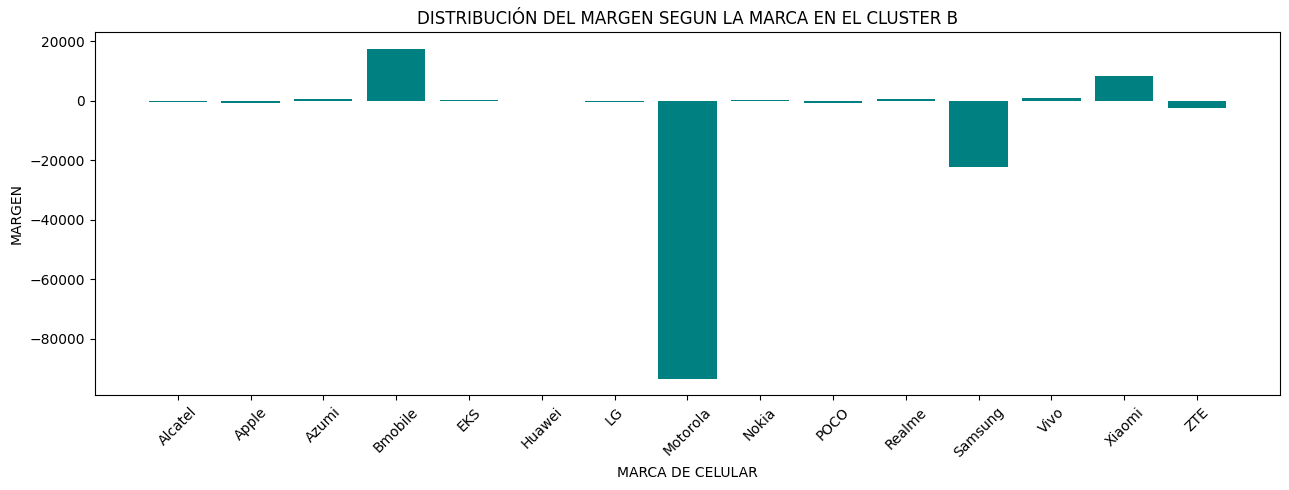

In [ ]:
# Filtrar el DataFrame para el clúster B
df_cluster_b = proyecto_df[proyecto_df['Cluster'].isin(['Cluster B'])]

# Encontrar la marca con el mejor margen en el clúster B
mejor_marca = df_cluster_b.groupby('Marca')['Margen'].sum()
# Mostrar la marca con el mejor margen
print(mejor_marca)
print("La mejor marca con el mejor margen en el Cluster B es:",mejor_marca.idxmax())
print("\n")
#Grafico según el margen para cada clúster B
plt.figure(figsize=(13,5))
plt.bar(mejor_marca.index, mejor_marca.values, color='teal')
plt.xlabel('MARCA DE CELULAR')
plt.ylabel('MARGEN')
plt.title('DISTRIBUCIÓN DEL MARGEN SEGUN LA MARCA EN EL CLUSTER B')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



# d.¿Qué canal tiene mayores costos? (Canal = Retail, Islas, Tiendas, Otros)

Canal
ISLAS      1.036438e+06
Otros      1.070989e+05
Retail     4.362606e+06
Tiendas    7.094548e+05
Name: Costo, dtype: float64
El tipo de canal con más costo es Retail con un total de 4362605.99




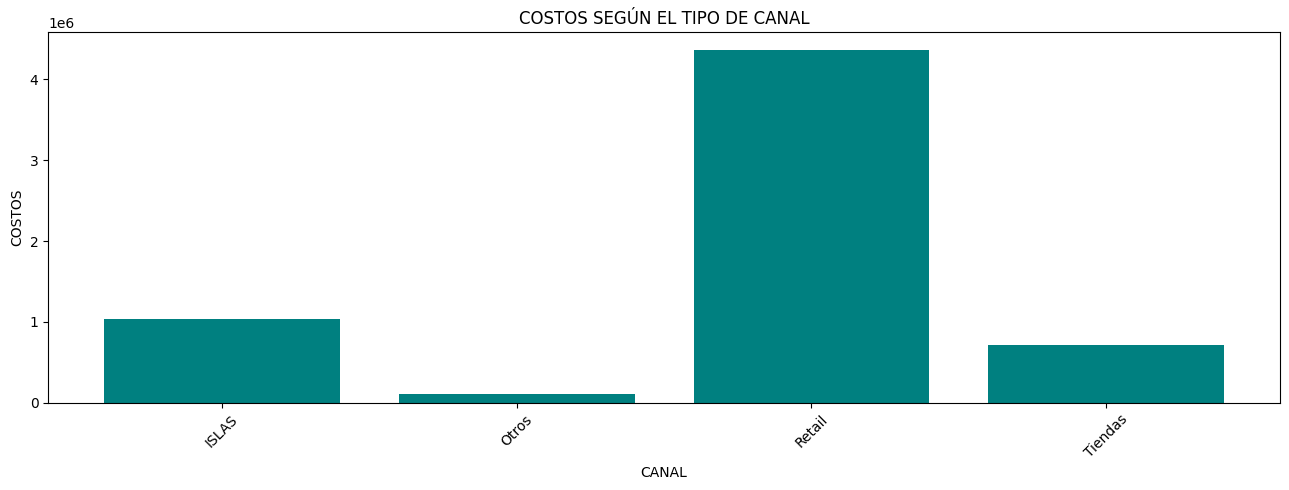

In [ ]:
# Calcular la suma de costos por tipo de Canal
costos = proyecto_df.groupby('Canal')['Costo'].sum()
print(costos)
# Encontrar el tipo de venta con más ingresos
tipo_mas_costo = costos.idxmax()
costos_maximos = costos.max()

# Mostrar el resultado
print(f"El tipo de canal con más costo es {tipo_mas_costo} con un total de {costos_maximos.round(2)}")
print('\n')

#Graficando
plt.figure(figsize=(13,5))
plt.bar(costos.index, costos.values, color='teal')
plt.xlabel('CANAL')
plt.ylabel('COSTOS')
plt.title('COSTOS SEGÚN EL TIPO DE CANAL')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# e. ¿Cómo están distribuidos los ingresos?, haga un boxplot y un histograma para explicar

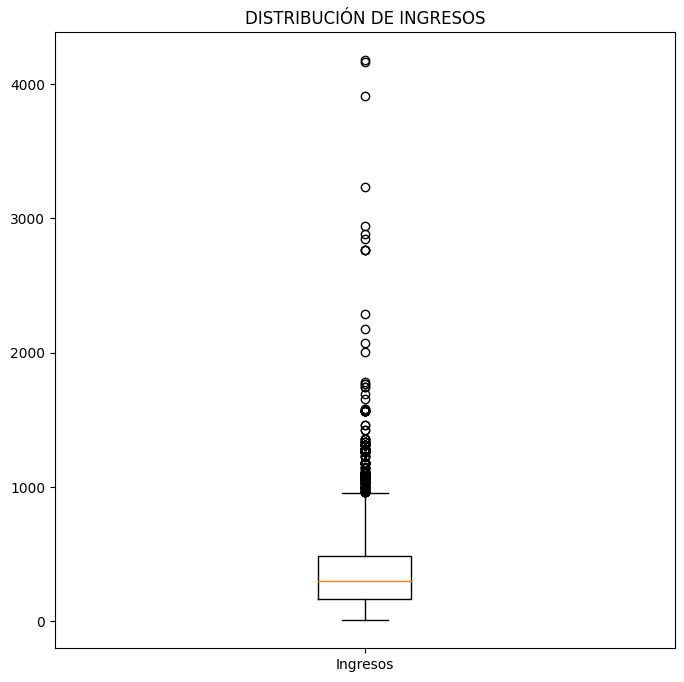

In [ ]:
# Gráfica de ingresos en BoxPlot
plt.figure(figsize=(8,8))
plt.boxplot(proyecto_df['Ingreso'])
plt.title('DISTRIBUCIÓN DE INGRESOS')
plt.xticks([1],['Ingresos']) #xticks es una fucnión para estables las ubicaciones y etiquetas del eje X
plt.show()


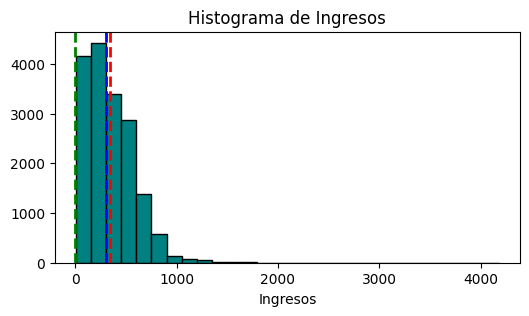

In [ ]:
# Gráfica de ingresos en Histograma
plt.figure(figsize=(6,3))
plt.hist(proyecto_df['Ingreso'],color='teal',edgecolor='black', bins=28)

plt.title('Histograma de Ingresos')
plt.xlabel('Ingresos')

plt.axvline(
    x=proyecto_df['Ingreso'].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=proyecto_df['Ingreso'].median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=proyecto_df['Ingreso'].mode().all(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.show()

**`CONLUSIÓN:`**

* Observamos que el gráfico tiene una asimetría estadística con un sesgo positivo, porque la media > mediana > moda.
* La mayor parte de los datos se encuentra en la parte izquierda de la distribución, mientras que la parte derecha contiene una cantidad menor de datos.
* Por lo tanto, en nuestra base de datos se concluye que la mayoría de las personas ganan salarios moderados, pero un pequeño porcentaje gana salarios extremadamente altos, lo que resulta en una distribución con sesgo positivo.

# f. ¿Qué día del mes tuvo más ingresos? (Use la variable ingresos)


In [ ]:
# Calcular la suma de ingresos por dia del mes
total_de_ingresos_por_dia = proyecto_df.groupby('Dia')['Ingreso'].sum()
print(total_de_ingresos_por_dia)
# Encontrar el tipo de venta con más ingresos
dia_mas_ingresos = total_de_ingresos_por_dia.idxmax()
dia_maximo = total_de_ingresos_por_dia.max()

# Mostrar el resultado
print(f"El día con más ingresos es {dia_mas_ingresos} con un total de {dia_maximo.round(2)}")
print('\n')

Dia
1     151170.133240
2     192838.888240
3     196976.888740
4     211631.183150
5     204546.324070
6     206393.487220
7     175356.043750
8     184942.769110
9     211877.255560
10    196146.296860
11    217114.940810
12    224014.735130
13    192334.476030
14    173297.839780
15    160785.595020
16    163027.465934
17    192903.288064
18    211901.760200
19    204002.249740
20    203036.975570
21    236031.968480
22    204902.249010
23    204929.110440
24    106452.803860
25    210213.664240
26    184287.288920
27    170576.030550
28    177577.508110
29    168571.501026
30    189406.332930
31    216406.314350
Name: Ingreso, dtype: float64
El día con más ingresos es 21 con un total de 236031.97




# g. Indique el Promedio, Máximo, Mínimo y Desviación estándar del Margen y explíquelo.

In [ ]:
# Hallando el prommedio
promedio = proyecto_df['Margen'].mean()

# Valor máximo
max = proyecto_df['Margen'].max()

# Valor mínimo
min = proyecto_df['Margen'].min()

# Desviación estándar
desviación = proyecto_df['Margen'].std()

print("El Margen promedio es:", promedio)
print("El valor máximo del Margen es:", max)
print("El valor mínimo del Margen es:", min)
print("El desviación estándar del margen es:", desviación)

El Margen promedio es: -15.863282849909577
El valor máximo del Margen es: 1125.119
El valor mínimo del Margen es: -1379.8768
El desviación estándar del margen es: 71.78977887927648


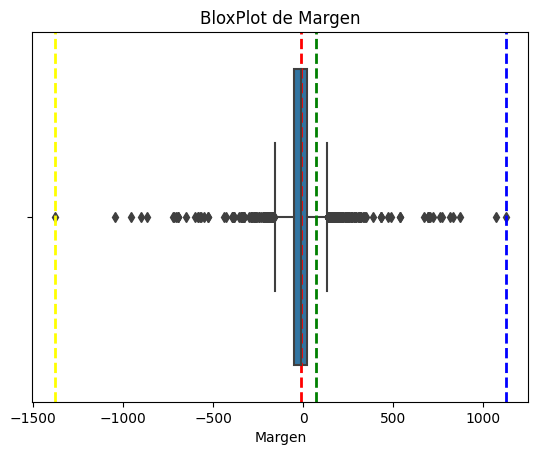

In [ ]:
sns.boxplot(
    x=proyecto_df['Margen'])
plt.title('BloxPlot de Margen')


plt.axvline(
    x=proyecto_df['Margen'].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=proyecto_df['Margen'].max(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=proyecto_df['Margen'].min(),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=proyecto_df['Margen'].std(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.show()

`CONCLUSIONES:`

* En el análisis estadistico podemos observar un margen promedio negativo, es decir, que los costos son mayores a los Ingresos. Esto significa que la empresa de Telecomunicaciones "OPACO" está sufriendo pérdidas en la venta de sus celulares.
* El margen máximo es 1125.119, esto nos da a entender que la empresa "OPACO" está operando de manera eficiente y rentable en la venta de sus celulares. Pero aún con oportunidades de mejorar.
* El margen mínimo es -1379.87, esto indica que la empresa "OPACO" está operando con una pequeña pérdida o un margen de ganancia extremadamente bajo. Esto significa que los costos de la entidad son casi iguales o ligeramente superiores a sus ingresos. En otras palabras, la entidad está casi en equilibrio financiero, pero aún incurre en pérdidas.
* Observamos que la desviación estándar es 71.78, esto indica que la variabilidad del margen de ganancias es moderada. Esto indica que la estabilidad financiada de la empresa "OPACO" no está en riesgo, pero se debe adoptar medidas para mejorar su margen promedio de ganancias, sino la empresa podria llegar a quebrar.

# h. Haga lo mismo que el punto G y abra la información por marca

In [ ]:
estadistica_marca = proyecto_df.groupby('Marca')['Margen'].agg(['mean','max','min','std'])
print(estadistica_marca)

                mean         max          min         std
Marca                                                    
Alcatel   -13.017679   672.45750  -167.794580   57.632457
Apple     -64.587837  1067.62400 -1046.784070  409.265463
Azumi      21.524526    32.93915    13.616780    6.278883
Bmobile    22.320633  1125.11900  -346.225420   46.882668
EKS        11.085362    22.03000     5.873220    4.805662
Huawei     65.955150   212.23730   -80.327000  206.874200
LG       -186.945457  -151.06360  -210.217100   25.803887
Motorola  -83.570260   329.32900  -551.181360   51.754343
Nokia      14.479495    69.25730   -78.156100   26.814008
POCO      -11.237557   187.99000   -79.205100   51.626219
Realme     32.555902   338.57500   -82.188100   93.230255
Samsung   -20.836761   345.46400 -1379.876800   71.803400
Vivo       13.330631   112.75580   -43.271500   45.671677
Xiaomi      5.061838   488.02300  -901.907120   77.277955
ZTE        -2.059824   151.58810  -441.005424   36.188622


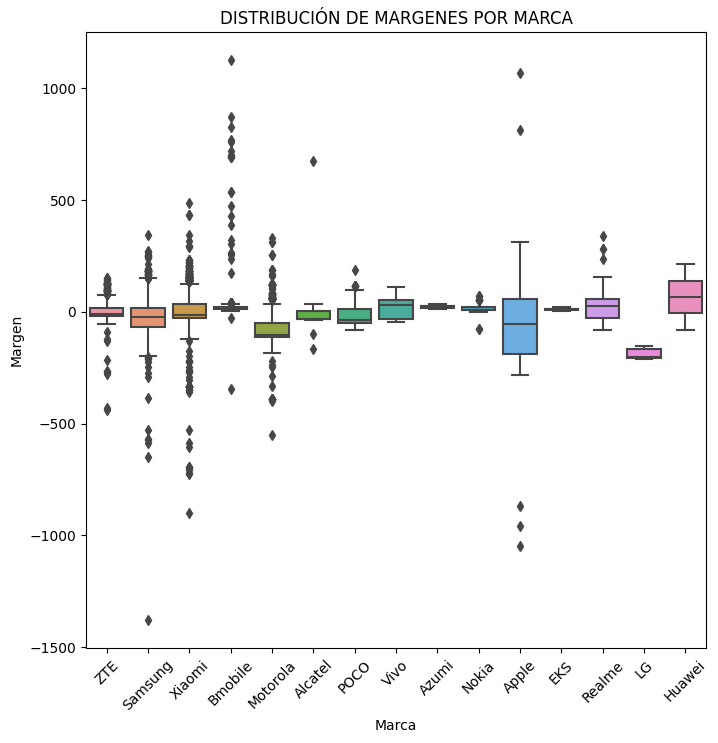

In [ ]:
# Haremos gráficos boxplot para apreciar el analisis estadistico de cada Marca
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Marca', y='Margen', data=proyecto_df)
plt.title('DISTRIBUCIÓN DE MARGENES POR MARCA')
plt.xlabel('Marca')
plt.ylabel('Margen')
plt.xticks(rotation = 45)
plt.show()


`CONCLUSIONES`

* Del gráfico observamos que la marca HUAWEI, tiene el mejor margen promedio de ganancias de la empresa "OPACO".
* La marca LG tiene el peor margen promedio de ganacias dentro de la empresa "OPACO", lo cual se recomendaría dejar de vender este tipo de marca.
* En el gráfico de la  marca APPLE, se puede observar una distribución bimodal. Es decir, que esta marca tiene 2 grupos de margenes diferentes. Un margen extremedamente alto y otro margen extremadamente bajo.
* La marca Bmobile, es la segunda con mejor margen promedio en la empresa "OPACO", esto se puede observar en el BoxPlot como la mayoría de sus margenes son postivos.
* La  distribución en el gráfico BoxPlot de la marca Xiaomi es similar al de la marca Samsung, esto nos indica que ambos tienen una variabilidad significativa en los márgenes y con algunos productos con márgenes bajos. Pero la marca Samsung es la que tiene un margen promedio negativo. A diferencia de la marca Xiaomi que tiene un margen promedio positivo muy bajo.